In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Class for the reuslts from windowed FFTs 

class powers:
    ''' class for storing instances of windowed FFT results, where window size and rolling window shift can be altered 
    
            PARAMETERS:
            magnitude: 2D array of FFT spectra, with shape (time_bins, frequency_bins) 
            frequency: central frequencies for each frequency band (Hz)
            n_window:  parameter deciding window size (window size = total number of samples/n_window)
            n_rolling: number of samples between rolling window '''

    def __init__(self,survey_power,total_power,n_sample):
        self.survey_power = survey_power
        self.total_power = total_power
        self.n_sample = n_sample

    def string_nsamples(self):
        integer_n = int(np.log10(self.n_sample))
        print(integer_n)
        return f'No. of samples: 10$^{{{integer_n}}}$'


# Example showing how this works
test = powers(np.asarray([1,2,3]),np.asarray([1,2,3]),1000)
print(test.string_nsamples())

3
No. of samples: 10$^{3}$


In [3]:
delta_t = 1.*10**(-3)
duration = 6.
survey_box = 0.468

n_tot = int(duration/delta_t)
n_survey_box = int(survey_box/delta_t)

power = np.zeros(n_tot)

change_nsamp = []

for j in range(2,7):
    n_samp = 10**j
    survey_av = []
    total_av = []
    for i in range(n_samp):
        burst_index = random.randrange(start=0,stop=n_tot)

        power[burst_index] = 1.

        survey_av.append(np.mean(power[:n_survey_box]))
        total_av.append(np.mean(power[:n_tot]))

        power = np.zeros(n_tot)

    change_nsamp.append(powers(survey_av,total_av,n_samp))


In [4]:
print(len(change_nsamp))
print(np.shape(change_nsamp[0].survey_power))
print(np.shape(change_nsamp[1].survey_power))

5
(100,)
(1000,)


2
2
3
3
4
4
5
5
6
6


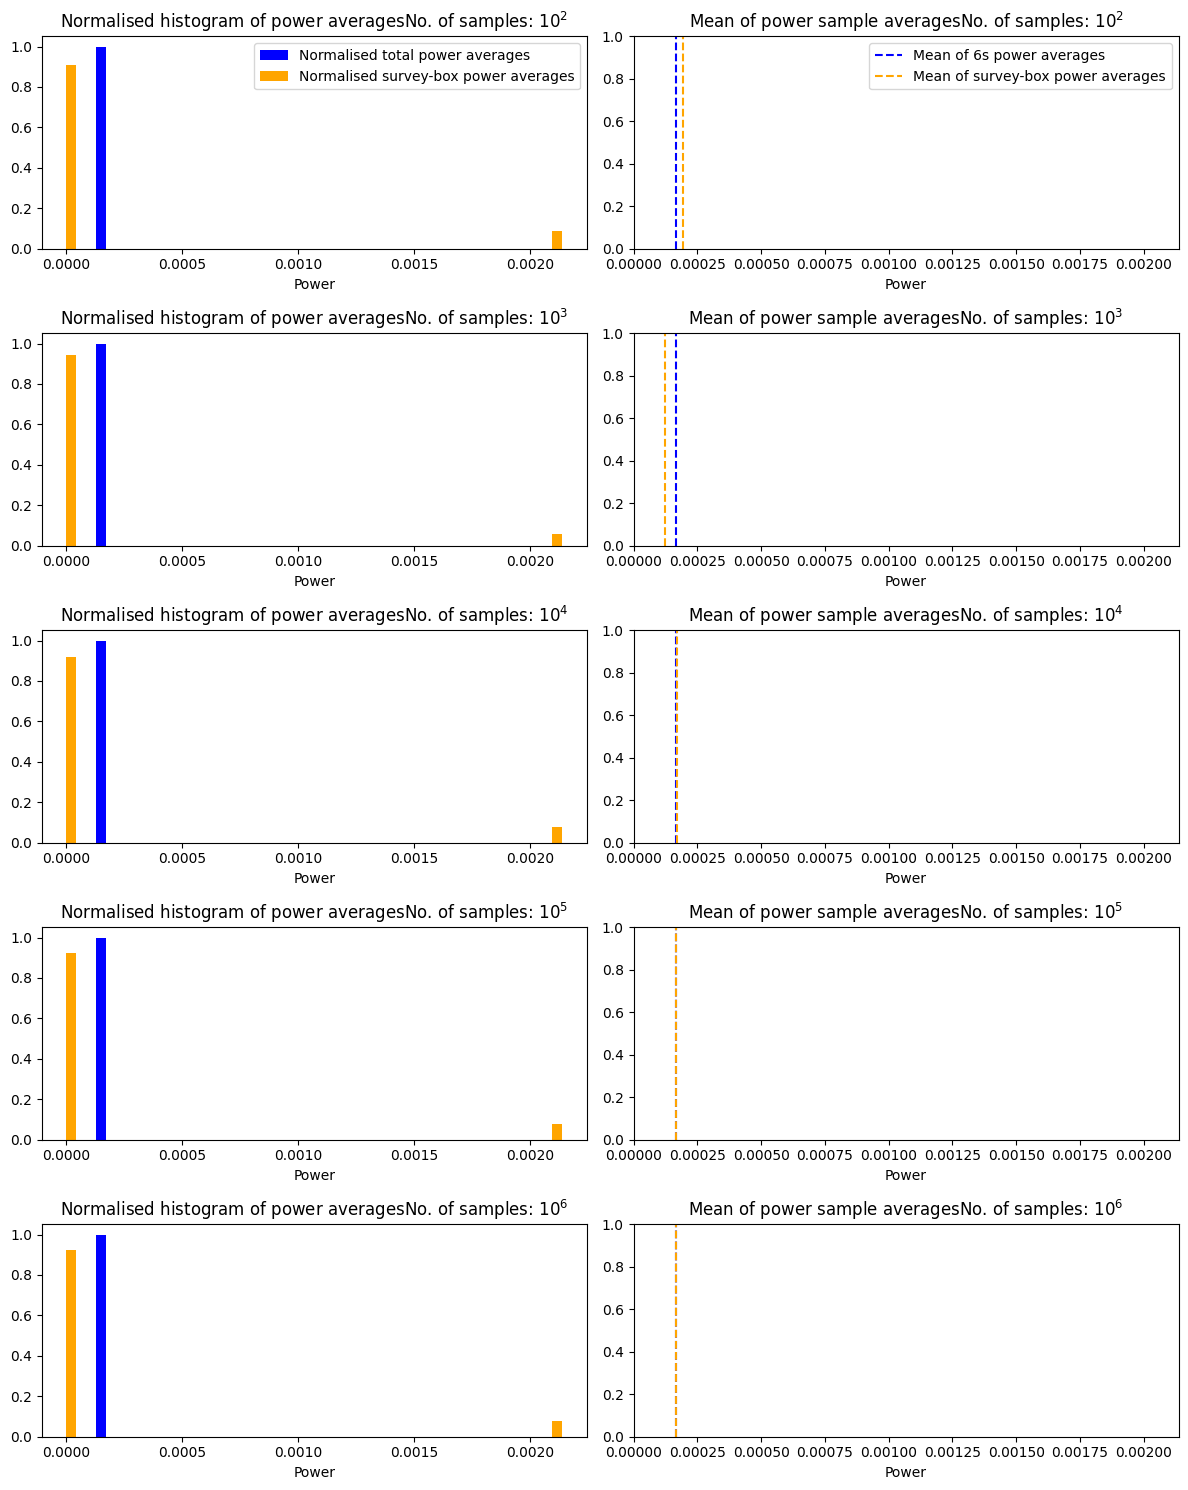

In [5]:
# create figure
fig, axs = plt.subplots(len(change_nsamp),2)

for i in range(len(change_nsamp)):

    bins=np.histogram(np.hstack((change_nsamp[i].survey_power,change_nsamp[i].total_power)), bins=50)[1] #get the bin edges

    weights = np.ones_like(change_nsamp[i].total_power)/float(len(change_nsamp[i].total_power)) # to normalise
    axs[i,0].hist(change_nsamp[i].total_power,bins=bins, label = "Normalised total power averages",color = 'blue',weights=weights)

    weights = np.ones_like(change_nsamp[i].survey_power)/float(len(change_nsamp[i].survey_power)) # to normalise
    axs[i,0].hist(change_nsamp[i].survey_power,bins=bins,label = "Normalised survey-box power averages",color = 'orange', weights= weights)
    axs[i,0].set_xlabel("Power")
    axs[i,0].set_title("Normalised histogram of power averages" + change_nsamp[i].string_nsamples())

    axs[i,1].axvline(x=np.mean(change_nsamp[i].total_power),label="Mean of 6s power averages",color = 'blue',linestyle='dashed')
    axs[i,1].axvline(x=np.mean(change_nsamp[i].survey_power),label="Mean of survey-box power averages",color = 'orange',linestyle = 'dashed')
    axs[i,1].set_xlim(0,np.max(change_nsamp[i].survey_power))
    axs[i,1].set_xlabel("Power")
    axs[i,1].set_title("Mean of power sample averages" + change_nsamp[i].string_nsamples())
    axs[0,0].legend()
    axs[0,1].legend()
plt.gcf().set_size_inches(12, len(change_nsamp)*3)
plt.tight_layout()
#plt.hist(total_av,bins=10)

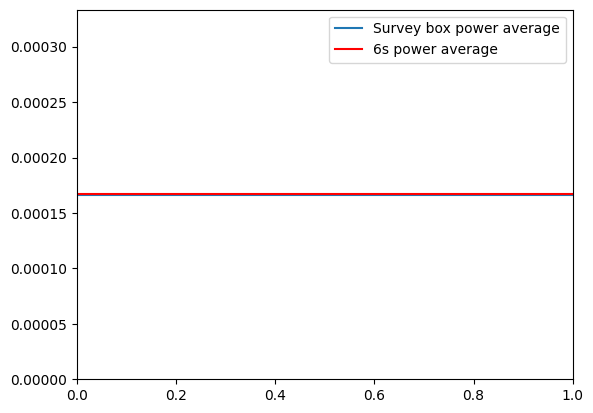

In [6]:
#plt.plot(survey_av,label="Survey box power")
#plt.plot(total_av,label="6s power"),
plt.axhline(np.mean(survey_av),label="Survey box power average")
plt.axhline(np.mean(total_av),label="6s power average",color = 'red')
plt.ylim(0.,2*np.mean(total_av))
plt.legend()